In [9]:
import pandas as pd
import numpy as np

In [10]:
players = pd.read_csv("players_22.csv")

C:\Users\sivek\AppData\Local\Temp\ipykernel_11980\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [11]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [12]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [13]:
players = players.dropna(subset=features)

In [14]:
data = players[features].copy()

In [15]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [16]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [17]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [18]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [35]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [36]:
centroids = random_centroids(data, 5)

C:\Users\sivek\AppData\Local\Temp\ipykernel_11980\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [61]:
centroids

,0,1,2,3,4
overall,2.739130,4.695652,6.217391,3.826087,4.260870
potential,6.434783,6.000000,2.739130,7.521739,8.173913
wage_eur,1.128755,2.759657,1.100143,1.014306,1.157368
value_eur,1.045930,1.024022,1.012423,1.026599,1.118098
age,3.962963,2.111111,3.222222,6.555556,8.777778


In [74]:
data.iloc[0:2]

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926


In [83]:
# data içindeki her satır için hangi merkeze daha yakın ise o merkezin indeksini döndürüyor...
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1))) # data içindeki her satırın her merkezden uzaklığı
    print(distances)
    return distances.idxmin(axis=1)

In [84]:
labels = get_labels(data, centroids)

               0          1          2          3          4
0      14.001705  12.724556  14.201619  12.697259  12.178394
1      13.551990  12.336988  13.717297  12.384279  12.010240
2      12.542613  11.482260  12.793274  10.961114  10.276796
3      13.395163  12.022607  13.499274  12.484781  12.331525
4      14.783094  13.324796  14.899916  13.913151  13.693229
...          ...        ...        ...        ...        ...
19234   5.144079   6.069818   5.330113   7.317802   9.168655
19235   4.135872   4.974069   5.353023   6.829649   8.950711
19236   4.619298   5.564275   5.249521   6.994716   8.957639
19237   3.966727   4.853852   5.375049   6.693355   8.831114
19238   3.966727   4.853852   5.375049   6.693355   8.831114

[19165 rows x 5 columns]


In [85]:
labels

0        4
1        4
2        4
3        1
4        1
        ..
19234    0
19235    0
19236    0
19237    0
19238    0
Length: 19165, dtype: int64

In [86]:
len(data)

19165

In [87]:
labels.value_counts()

0    5905
1    5685
3    5437
2    1482
4     656
Name: count, dtype: int64

In [94]:
data.groupby(labels).get_group(0)

,overall,potential,wage_eur,value_eur,age
5689,5.782609,5.782609,1.185980,1.082014,4.703704
5733,5.782609,5.782609,1.100143,1.087169,4.703704
5798,5.782609,5.782609,1.185980,1.082014,4.703704
5825,5.782609,5.782609,1.001431,1.087169,4.703704
5842,5.782609,5.782609,1.185980,1.076859,4.703704
...,...,...,...,...,...
19234,1.000000,1.652174,1.014306,1.003144,3.222222
19235,1.000000,3.173913,1.000000,1.005206,2.111111
19236,1.000000,2.304348,1.000000,1.004691,2.851852
19237,1.000000,3.391304,1.000000,1.005206,2.111111


In [95]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [97]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

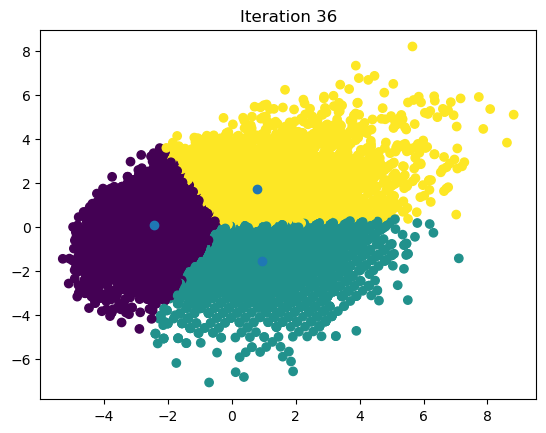

In [102]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [127]:
centroids

,0,1,2
overall,3.443294,5.200401,6.336567
potential,5.362259,4.894314,7.107863
wage_eur,1.031502,1.130802,1.460086
value_eur,1.029525,1.049844,1.313192
age,2.678624,5.962199,3.877681


In [129]:
labels.value_counts()

1    7192
0    6198
2    5775
Name: count, dtype: int64

In [107]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13267,K. Nagera,63,80,8000.0,1300000.0,19
13351,Llabrés,63,81,3000.0,1200000.0,19
14026,M. Azeez,62,83,4000.0,1300000.0,18
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [108]:
from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [110]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,5.228221,3.884829,6.810066
potential,4.898904,5.670518,7.251112
wage_eur,1.126390,1.044129,1.729850
value_eur,1.044718,1.039637,1.460097
age,6.120163,2.901558,4.479626
